________________________________________________________________________________
**Import required libraries and modules**
________________________________________________________________________________


In [52]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import preprocessing
from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

________________________________________________________________________________
**Read the data**
________________________________________________________________________________


In [53]:
train = pd.read_parquet('/content/train.parquet')
test = pd.read_parquet('/content/test.parquet')

In [54]:
train.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [55]:
test.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True
2,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30 15:01:34+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-01,[None],https://i.ytimg.com/vi/F1Hq8eVOMHs/default.jpg,False,False,"The first 1,000 people to use this link will g...",F1Hq8eVOMHs_2021-12-01,728.0,True,True
3,GQXVQmcGQUY,Things Get Strange With The UnderTaker | Cold ...,2021-11-30 16:00:27+00:00,UCLRmIdRJgLfmdpJufmBhBuA,LOL Network,23,2021-12-01,kevin hart|hartbeat productions|funny|comedy|c...,https://i.ytimg.com/vi/GQXVQmcGQUY/default.jpg,False,False,#PoweredByOldSpice Thought by many as one of t...,GQXVQmcGQUY_2021-12-01,829.0,True,True
4,n4XojTb6pfs,People Pleasers at a Restaurant,2021-11-30 17:15:02+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/n4XojTb6pfs/default.jpg,False,False,I apologize for existing - please throw me out...,n4XojTb6pfs_2021-12-01,31.0,True,True


In [56]:
train.shape

(92275, 20)

In [57]:
test.shape

(5800, 16)

________________________________________________________________________________
**Preprocessing the dataset**
________________________________________________________________________________


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           5800 non-null   object             
 1   title              5800 non-null   object             
 2   publishedAt        5800 non-null   datetime64[ns, UTC]
 3   channelId          5800 non-null   object             
 4   channelTitle       5800 non-null   object             
 5   categoryId         5800 non-null   int64              
 6   trending_date      5800 non-null   object             
 7   tags               5800 non-null   object             
 8   thumbnail_link     5800 non-null   object             
 9   comments_disabled  5800 non-null   bool               
 10  ratings_disabled   5800 non-null   bool               
 11  description        5391 non-null   object             
 12  id                 5800 non-null   object       

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92275 entries, 0 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           92275 non-null  object             
 1   title              92275 non-null  object             
 2   publishedAt        92275 non-null  datetime64[ns, UTC]
 3   channelId          92275 non-null  object             
 4   channelTitle       92275 non-null  object             
 5   categoryId         92275 non-null  int64              
 6   trending_date      92275 non-null  object             
 7   tags               92275 non-null  object             
 8   view_count         92275 non-null  int64              
 9   likes              92275 non-null  int64              
 10  dislikes           92275 non-null  int64              
 11  comment_count      92275 non-null  int64              
 12  thumbnail_link     92275 non-null  object     

In [60]:
train.describe()

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,92275.000000,9.227500e+04,9.227500e+04,92275.000000,9.227500e+04,90099.000000,92275.000000
mean,18.733416,2.779091e+06,1.521223e+05,3110.977307,1.373574e+04,760.614602,0.057060
std,6.866404,7.364113e+06,4.374777e+05,13342.743386,9.672682e+04,5816.818926,0.040373
min,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,17.000000,5.312440e+05,2.136300e+04,368.000000,1.692000e+03,184.000000,0.028066
50%,20.000000,1.100045e+06,5.169200e+04,852.000000,3.856000e+03,446.000000,0.050784
75%,24.000000,2.482274e+06,1.312825e+05,2239.000000,9.322000e+03,854.000000,0.075265
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,485620.000000,0.433503


In [61]:
train.nunique()

video_id             16969
title                17321
publishedAt          16692
channelId             4563
channelTitle          4632
categoryId              15
trending_date          461
tags                 12891
view_count           90915
likes                71880
dislikes             12805
comment_count        25556
thumbnail_link       16969
comments_disabled        2
ratings_disabled         2
description          17703
id                   92275
duration_seconds      2327
has_thumbnail            2
target               91831
dtype: int64

In [62]:
Miss_train = train.isna().sum()
Miss_train

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1476
id                      0
duration_seconds     2176
has_thumbnail           0
target                  0
dtype: int64

In [63]:
Miss_test = test.isna().sum()
Miss_test

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          409
id                     0
duration_seconds      20
has_thumbnail          0
isTest                 0
dtype: int64

________________________________________________________________________________
**Exploratory Data Analysis**
________________________________________________________________________________


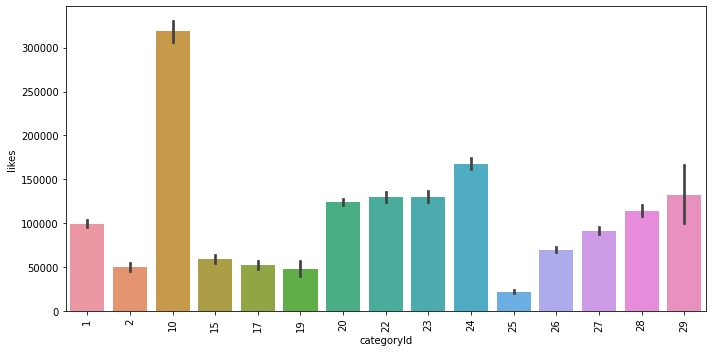

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x='categoryId', y="likes", data=train.sort_values(by='categoryId', ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

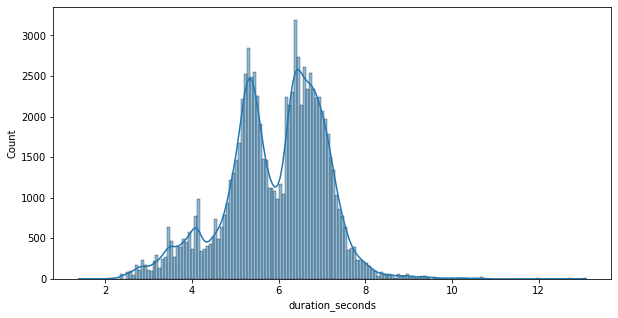

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(train['duration_seconds']),kde=True)

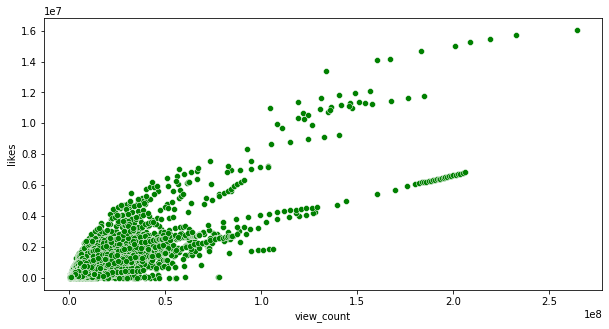

In [66]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='view_count', y= 'likes', data =train, color = 'green')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


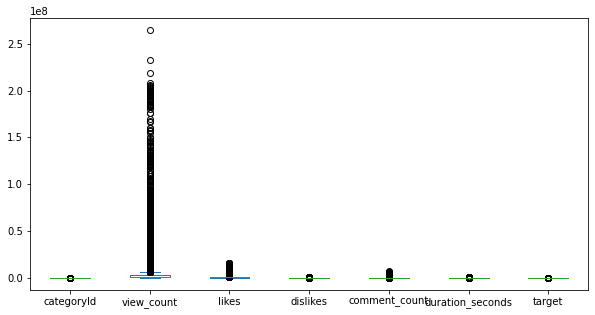

In [67]:
train.plot.box(figsize=(10,5))

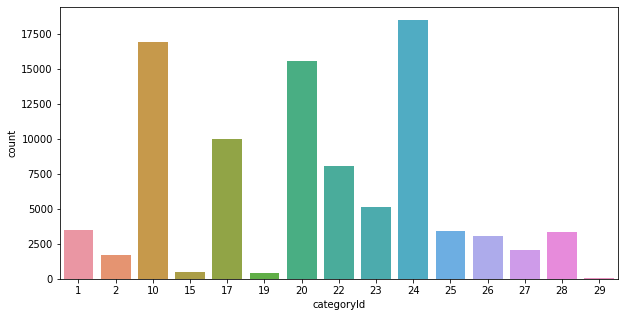

In [68]:
plt.figure(figsize = (10,5))
sns.countplot(x='categoryId',data=train)

In [69]:
data_corr = train.corr()
data_corr

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,target
categoryId,1.000000,-0.054252,-0.084881,-0.040228,-0.062841,0.091213,0.014993,0.042177,-0.007075,-0.096996
view_count,-0.054252,1.000000,0.851246,0.699140,0.539548,0.001978,0.016042,0.054755,0.002110,-0.021704
likes,-0.084881,0.851246,1.000000,0.663915,0.718915,-0.026965,-0.024179,-0.010461,0.002426,0.203877
dislikes,-0.040228,0.699140,0.663915,1.000000,0.532053,0.011013,-0.016213,0.021782,-0.011976,0.004226
comment_count,-0.062841,0.539548,0.718915,0.532053,1.000000,-0.018236,-0.006027,-0.006032,-0.004784,0.081980
comments_disabled,0.091213,0.001978,-0.026965,0.011013,-0.018236,1.000000,0.179496,0.023383,-0.024129,-0.089399
ratings_disabled,0.014993,0.016042,-0.024179,-0.016213,-0.006027,0.179496,1.000000,-0.001916,0.002951,-0.098274
duration_seconds,0.042177,0.054755,-0.010461,0.021782,-0.006032,0.023383,-0.001916,1.000000,0.004861,-0.035656
has_thumbnail,-0.007075,0.002110,0.002426,-0.011976,-0.004784,-0.024129,0.002951,0.004861,1.000000,0.019487
target,-0.096996,-0.021704,0.203877,0.004226,0.081980,-0.089399,-0.098274,-0.035656,0.019487,1.000000


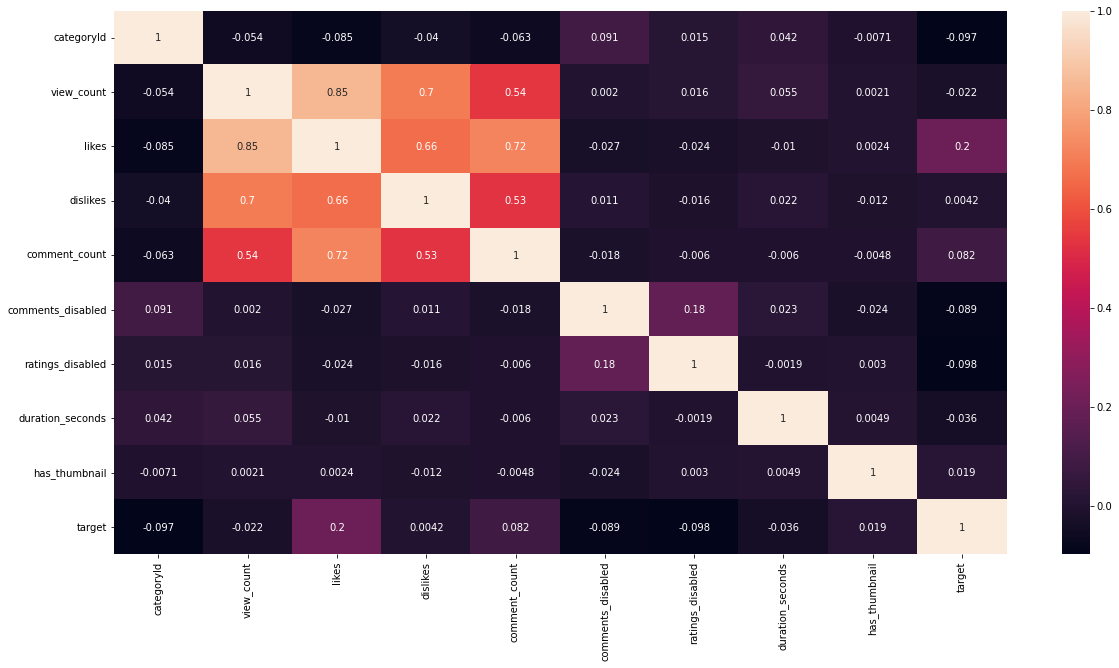

In [70]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr, annot=True)
plt.show()

________________________________________________________________________________
**Data Preprocessing**
________________________________________________________________________________


In [71]:
train['duration_seconds'] = train['duration_seconds'].fillna(train['duration_seconds'].median())
test['duration_seconds'] = test['duration_seconds'].fillna(test['duration_seconds'].median())

In [72]:
train['description'] = train['description'].fillna(train['description'].mode()[0])
test['description'] = test['description'].fillna(test['description'].mode()[0])

In [73]:
train['trending_date'] = pd.to_datetime(train.trending_date)
train['trending_date'] = pd.to_datetime(train.trending_date)

In [74]:
train["Month"]=pd.DatetimeIndex(train['trending_date']).month
train["Year"]=pd.DatetimeIndex(train['trending_date']).year
train["Day"]=pd.DatetimeIndex(train['trending_date']).day

test["Month"]=pd.DatetimeIndex(test['trending_date']).month
test["Year"]=pd.DatetimeIndex(test['trending_date']).year
test["Day"]=pd.DatetimeIndex(test['trending_date']).day

In [75]:
train = train.drop(["trending_date"], axis=1)

test = test.drop(["trending_date"], axis=1)

In [76]:
train2 = train[['publishedAt', 'categoryId', 'view_count', 'likes', 
                'dislikes', 'comments_disabled', 'ratings_disabled', 
                'duration_seconds', 'has_thumbnail', 'target', 'Month', 'Year', 'Day', 'comment_count']]

test2 = test[['publishedAt', 'categoryId', 'comments_disabled', 'ratings_disabled', 
                'duration_seconds', 'has_thumbnail', 'isTest', 'Month', 'Year', 'Day']]

In [77]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92275 entries, 0 to 92274
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        92275 non-null  datetime64[ns, UTC]
 1   categoryId         92275 non-null  int64              
 2   view_count         92275 non-null  int64              
 3   likes              92275 non-null  int64              
 4   dislikes           92275 non-null  int64              
 5   comments_disabled  92275 non-null  bool               
 6   ratings_disabled   92275 non-null  bool               
 7   duration_seconds   92275 non-null  float64            
 8   has_thumbnail      92275 non-null  bool               
 9   target             92275 non-null  float64            
 10  Month              92275 non-null  int64              
 11  Year               92275 non-null  int64              
 12  Day                92275 non-null  int64      

In [78]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        5800 non-null   datetime64[ns, UTC]
 1   categoryId         5800 non-null   int64              
 2   comments_disabled  5800 non-null   bool               
 3   ratings_disabled   5800 non-null   bool               
 4   duration_seconds   5800 non-null   float64            
 5   has_thumbnail      5800 non-null   bool               
 6   isTest             5800 non-null   bool               
 7   Month              5800 non-null   int64              
 8   Year               5800 non-null   int64              
 9   Day                5800 non-null   int64              
dtypes: bool(4), datetime64[ns, UTC](1), float64(1), int64(4)
memory usage: 294.7 KB


In [79]:
train2["published Month"]=pd.DatetimeIndex(train2['publishedAt']).month
train2["published Year"]=pd.DatetimeIndex(train2['publishedAt']).year
train2["published Day"]=pd.DatetimeIndex(train2['publishedAt']).day
train2["published Hour"]=pd.DatetimeIndex(train2['publishedAt']).hour
train2["published Second"]=pd.DatetimeIndex(train2['publishedAt']).second

test2["published Month"]=pd.DatetimeIndex(test2['publishedAt']).month
test2["published Year"]=pd.DatetimeIndex(test2['publishedAt']).year
test2["published Day"]=pd.DatetimeIndex(test2['publishedAt']).day
test2["published Hour"]=pd.DatetimeIndex(test2['publishedAt']).hour
test2["published Second"]=pd.DatetimeIndex(test2['publishedAt']).second

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [80]:
train2 = train2.drop(['publishedAt'], axis=1)

test2 = test2.drop(['publishedAt'], axis=1)

In [81]:
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(train2['target'])
train2['target'] = label_encoder.transform(train2['target'])

label_encoder.fit(train2['view_count'])
train2['view_count'] = label_encoder.transform(train2['view_count'])

label_encoder.fit(train2['likes'])
train2['likes'] = label_encoder.transform(train2['likes'])

label_encoder.fit(train2['dislikes'])
train2['dislikes'] = label_encoder.transform(train2['dislikes'])

label_encoder.fit(train2['duration_seconds'])
train2['duration_seconds'] = label_encoder.transform(train2['duration_seconds'])

In [82]:
train2 = train2.drop(["target"], axis=1)
test2 = test2.drop(["isTest"], axis=1)

In [83]:
train2['dislikes'] = train2['dislikes'].fillna(train2['dislikes'].mean())

In [84]:
train_data=pd.concat([train2, test2],axis=0, join='outer')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98075 entries, 0 to 5799
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   categoryId         98075 non-null  int64  
 1   view_count         92275 non-null  float64
 2   likes              92275 non-null  float64
 3   dislikes           92275 non-null  float64
 4   comments_disabled  98075 non-null  bool   
 5   ratings_disabled   98075 non-null  bool   
 6   duration_seconds   98075 non-null  float64
 7   has_thumbnail      98075 non-null  bool   
 8   Month              98075 non-null  int64  
 9   Year               98075 non-null  int64  
 10  Day                98075 non-null  int64  
 11  comment_count      92275 non-null  float64
 12  published Month    98075 non-null  int64  
 13  published Year     98075 non-null  int64  
 14  published Day      98075 non-null  int64  
 15  published Hour     98075 non-null  int64  
 16  published Second   9807

In [85]:
test_data=pd.concat([train2, test2],axis=0, join='outer')
test_data = test_data.drop(['view_count'], axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98075 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   categoryId         98075 non-null  int64  
 1   likes              92275 non-null  float64
 2   dislikes           92275 non-null  float64
 3   comments_disabled  98075 non-null  bool   
 4   ratings_disabled   98075 non-null  bool   
 5   duration_seconds   98075 non-null  float64
 6   has_thumbnail      98075 non-null  bool   
 7   Month              98075 non-null  int64  
 8   Year               98075 non-null  int64  
 9   Day                98075 non-null  int64  
 10  comment_count      92275 non-null  float64
 11  published Month    98075 non-null  int64  
 12  published Year     98075 non-null  int64  
 13  published Day      98075 non-null  int64  
 14  published Hour     98075 non-null  int64  
 15  published Second   98075 non-null  int64  
dtypes: bool(3), float64(4),

In [86]:
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

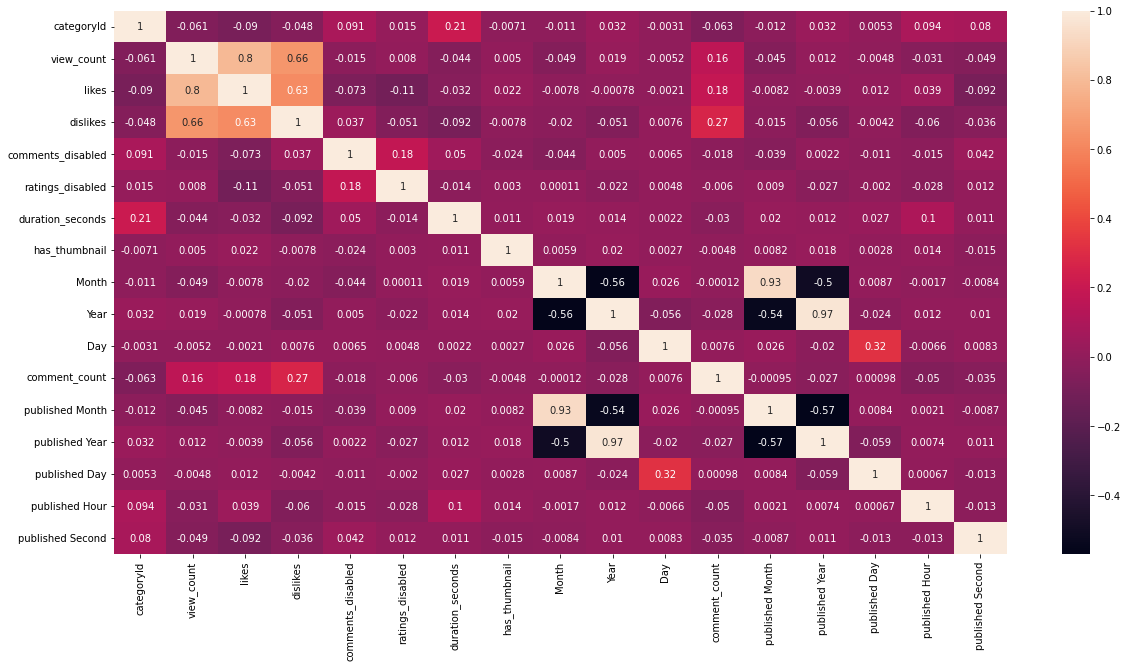

In [87]:
data_corr = train_data.corr()
data_corr

plt.figure(figsize=(20, 10))
sns.heatmap(data_corr, annot=True)
plt.show()

________________________________________________________________________________
1. **Spliting the Dataset into Training and Testing** 
2. **Training**
3. **Check models and algorithm scores**
________________________________________________________________________________


In [88]:
X_train = train_data.drop(['view_count'], axis = 1)
Y_train = train_data['view_count']
X_test = test_data
Y_test = train_data['view_count']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((92275, 16), (92275,), (92275, 16), (92275,))

**Apply the Linear regression**

In [89]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [90]:
preds = model.predict(X_test)

In [91]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, preds))

Coefficient of determination: 0.70


**Apply the XGBRegressor**

In [92]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbr.fit(X_train, Y_train)

XGBRegressor(verbosity=0)


XGBRegressor(verbosity=0)

In [93]:
score = xgbr.score(X_train, Y_train)  
print("Training score: ", score)

Training score:  0.8233876243820976


In [94]:
print(preds)

[ 64591.41598041  57293.08176357  67087.8282134  ...  23710.41794366
 105590.27887506  29841.39995977]


**Use prediction as target variable №1**

In [95]:
test_data['view_count'] = preds

In [96]:
train_data.head()

,categoryId,view_count,likes,dislikes,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,Month,Year,Day,comment_count,published Month,published Year,published Day,published Hour,published Second
0,22,54670.0,52834.0,5624.0,False,False,440.0,True,8,2020,12,35313.0,8,2020,11,19,14
1,20,66920.0,51621.0,2786.0,False,False,440.0,True,8,2020,12,16549.0,8,2020,11,17,10
2,24,63124.0,63999.0,2622.0,False,False,440.0,True,8,2020,12,40221.0,8,2020,11,16,6
3,10,20459.0,15044.0,1850.0,False,False,440.0,True,8,2020,12,7647.0,8,2020,11,16,55
4,26,45666.0,27267.0,958.0,False,False,440.0,True,8,2020,12,2196.0,8,2020,11,15,5


In [105]:
test_data.head()

,categoryId,dislikes,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,Month,Year,Day,comment_count,published Month,published Year,published Day,published Hour,published Second,view_count
0,22,5624.0,False,False,440.0,True,8,2020,12,35313.0,8,2020,11,19,14,64591.415980
1,20,2786.0,False,False,440.0,True,8,2020,12,16549.0,8,2020,11,17,10,57293.081764
2,24,2622.0,False,False,440.0,True,8,2020,12,40221.0,8,2020,11,16,6,67087.828213
3,10,1850.0,False,False,440.0,True,8,2020,12,7647.0,8,2020,11,16,55,26287.055322
4,26,958.0,False,False,440.0,True,8,2020,12,2196.0,8,2020,11,15,5,33706.036746


In [104]:
test_data = test_data.drop(['likes'], axis=1)

In [106]:
X_train = train_data.drop(['likes'], axis = 1)
Y_train = train_data['likes']
X_test = test_data
Y_test = train_data['likes']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((92275, 16), (92275,), (92275, 16), (92275,))

In [107]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [108]:
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [109]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, preds))

Coefficient of determination: -8410666.90


In [103]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbr.fit(X_train, Y_train)

XGBRegressor(verbosity=0)


XGBRegressor(verbosity=0)

In [110]:
score = xgbr.score(X_train, Y_train)  
print("Training score: ", score)

Training score:  0.8738896433036859


**Use prediction as target variable №2**

In [111]:
test_data['likes'] = preds

In [120]:
train_data['target'] = train['target']

In [125]:
train_data.head()

,categoryId,likes,dislikes,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,Month,Year,Day,comment_count,published Month,published Year,published Day,published Hour,published Second,target
0,22,52834.0,5624.0,False,False,440.0,True,8,2020,12,35313.0,8,2020,11,19,14,0.103596
1,20,51621.0,2786.0,False,False,440.0,True,8,2020,12,16549.0,8,2020,11,17,10,0.061611
2,24,63999.0,2622.0,False,False,440.0,True,8,2020,12,40221.0,8,2020,11,16,6,0.173523
3,10,15044.0,1850.0,False,False,440.0,True,8,2020,12,7647.0,8,2020,11,16,55,0.046804
4,26,27267.0,958.0,False,False,440.0,True,8,2020,12,2196.0,8,2020,11,15,5,0.040753


In [127]:
test_data.head()

,categoryId,dislikes,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,Month,Year,Day,comment_count,published Month,published Year,published Day,published Hour,published Second,likes
0,22,5624.0,False,False,440.0,True,8,2020,12,35313.0,8,2020,11,19,14,-3.568105e+07
1,20,2786.0,False,False,440.0,True,8,2020,12,16549.0,8,2020,11,17,10,-2.514072e+07
2,24,2622.0,False,False,440.0,True,8,2020,12,40221.0,8,2020,11,16,6,-3.847506e+07
3,10,1850.0,False,False,440.0,True,8,2020,12,7647.0,8,2020,11,16,55,-1.868959e+07
4,26,958.0,False,False,440.0,True,8,2020,12,2196.0,8,2020,11,15,5,-1.613948e+07


**Use previous prediction and original target variable "target'**

In [124]:
train_data = train_data.drop(['view_count'], axis=1)

In [112]:
test_data = test_data.drop(['view_count'], axis=1)

In [128]:
X_train = train_data.drop(['target'], axis = 1)
Y_train = train_data['target']
X_test = test_data
Y_test = train_data['target']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((92275, 16), (92275,), (92275, 16), (92275,))

In [129]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [130]:
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [131]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, preds))

Coefficient of determination: -743451542.76


In [132]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbr.fit(X_train, Y_train)

XGBRegressor(verbosity=0)


XGBRegressor(verbosity=0)

In [133]:
score = xgbr.score(X_train, Y_train)  
print("Training score: ", score)

Training score:  0.6575802592923619
